Note - this analysis uses the data from the following reference.

Laabei M, Uhlemann A-C, Lowy FD, Austin ED, Yokoyama M, Ouadi K, et al. Evolutionary Trade-Offs Underlie the Multi-faceted Virulence of Staphylococcus aureus. PLOS Biology. 2015;13(9):e1002229.


#### Import dataset

In [37]:
import pandas as pd
data = pd.read_csv("isolate_data.csv",  na_values = "N/A")
data

,Isolate,Genotype,Source,T2,THP1
0,MR005,Wildtype clinical USA300,Blood (bacteraemia),58.133333,80.533333
1,MR007,Wildtype clinical USA300,Blood (bacteraemia),27.466667,37.333333
2,MR018,Wildtype clinical USA300,Blood (bacteraemia),11.500000,5.233333
3,MR019,Wildtype clinical USA300,Blood (bacteraemia),69.933333,73.200000
4,MR021,Wildtype clinical USA300,Blood (bacteraemia),70.266667,84.033333
...,...,...,...,...,...
69,USFL271,Wildtype clinical USA300,Nose/skin (carriage),83.666667,69.400000
70,USFL272,Wildtype clinical USA300,Nose/skin (carriage),41.000000,13.566667
71,USFL302,Wildtype clinical USA300,Nose/skin (carriage),80.100000,54.300000
72,USFL303,Wildtype clinical USA300,Nose/skin (carriage),90.466667,67.400000


Pandas function read_csv imports the file, converts it to a Dataframe and assigns "N/A" as a missing value. We can now view the dataset to ensure formatting is correct. This is a dataset of clinical isolates, the source of infection (either bacteraemia or carriage) and two measures of how cytotoxic each isolate to cell lines, T2 cells and THP-1 cells. 

#### Explore data

In [38]:
import seaborn as sns
sns.set_theme()

To visualise the data and explore any relationships we import seaborn, a third-party library for data visualisation

In [39]:
sns.set_style("ticks")
colours = ["coral", "cadetblue"]
customPalette = sns.set_palette(sns.color_palette(colours))

This sets the style and colour palette for the graphs

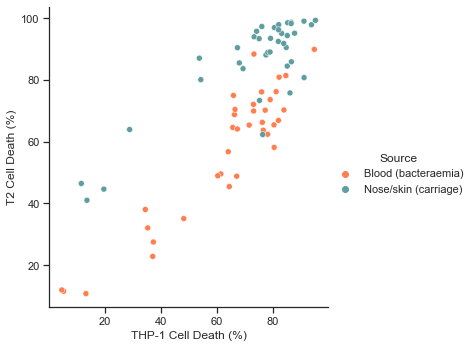

In [40]:
ax = sns.relplot(data=data, x="THP1", y="T2", hue = "Source", palette=customPalette)

ax.set_titles("")
ax.set_ylabels("T2 Cell Death (%)", clear_inner=False)
ax.set_xlabels("THP-1 Cell Death (%)", clear_inner=False)

Firstly, the association between T2 and THP-1 toxicity was visualised, two measures of the cytotoxicity of each bacterial isolate. This was visualised as a scatterplot using the sns.relplot function. There is a clear positive association between the two variables, indicating that as THP-1 cell death increases, T2 cell death also increases. When we include the source of the infection as the "hue" of each point, we can also see clustering in that the bacteraemia isolates are less toxic than the carriage isolates.

In [41]:
data.corr()

,T2,THP1
T2,1.000000,0.818053
THP1,0.818053,1.000000


We can find out how correlated the two variables are using data.corr(). This confirms a strong positive correlation of 0.82

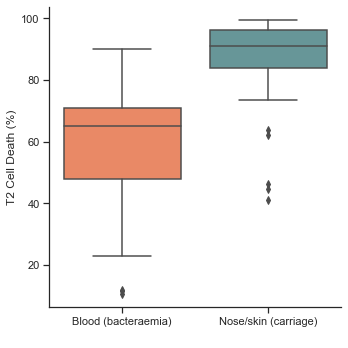

In [42]:
bx = sns.catplot(data=data, x="Source", y="T2", kind = "box")

bx.set_titles("")
bx.set_ylabels("T2 Cell Death (%)", clear_inner=False)
bx.set_xlabels(" ", clear_inner=False)

This line of code plots a boxplot of T2 cell death against the source of infection (blood or nose/skin) using the sns.catplot() function. From this, it is clear that bacteramia isolates are less cytotoxic to T2 cells than carriage isolates. 

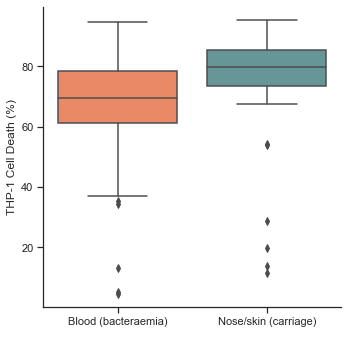

In [43]:
bx2 = sns.catplot(data=data, x="Source", y="THP1", kind = "box")

bx2.set_titles("")
bx2.set_ylabels("THP-1 Cell Death (%)", clear_inner=False)
bx2.set_xlabels(" ", clear_inner=False)

We can also plot a boxplot of THP-1 cell death against source of infection. The same trend can be seen, but this is to a lesser extent than T2 cells.

#### Linear regression models

All data

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

Given the strong positive correlation, A linear regression model was fitted. Firstly, the model was imported from sklearn and to ensure that the model fits the y-intercept the "fit_intercept = True" hyperparameter was included

In [45]:
X = data[["THP1"]]
y = data["T2"]

Firstly we split our data into two variables in a suitable format for the linear regression model. The x variable must be a 2D dataframe, which we created using data[["THP-1"]] and the y, a series using data["T2"]

In [46]:
model.fit(X, y)

LinearRegression()

The model.fit() function then fits the linear regression model to our data.

In [47]:
x_fit = pd.DataFrame({"THP1": [0, 100]})
y_pred = model.predict(x_fit)

We then create a dataframe of x values and predict the y values using the model to create values for a prediction line

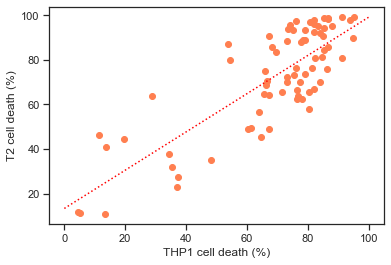

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X["THP1"], y)
ax.set_ylabel("T2 cell death (%)")
ax.set_xlabel("THP1 cell death (%)")
ax.plot(x_fit, y_pred, linestyle=":", color="red",);

This code plots our scatter plot, but including the prediction line from the model

In [49]:
print(" Model gradient: ", model.coef_[0])
print("Model intercept:", model.intercept_)

 Model gradient:  0.8573322611015526
Model intercept: 13.387508464746631


We can also print the gradient and intercept of the prediction line. This can be represented as y = 0.86x + 13.39

In [50]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

To check whether this model represents our data well we split our data into a subset of data to fit with and a subset of data to test against using the tran_test_split() function from sklearn

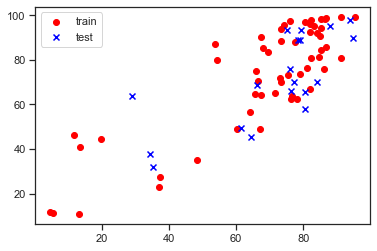

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="red", marker="o", label="train")
ax.scatter(test_X, test_y, color="blue", marker="x", label="test")
ax.legend()

We can then plot our datasets to ensure an equal distribution of our train and test datasets

In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

LinearRegression()

Then we fit our model again to the train x and y values

In [53]:
model.score(test_X, test_y)

0.4796448943771755

Finally we produce a model score by passing our test data through the model.score() function. Despite the high positive correlation between T2 and THP-1 cell death, a linear regression model only provides a low model score of 0.48. My hypothesis for this is due to the clustering of bacteremia and carriage isolates, there is too much variation around the prediction line for an accurate model. To explore this, the dataset was split into only either bacteremia or carriage isolates andthe linear regression model repeated to see if this improves the model score.

Bloodstream infections

In [54]:
blood_filter = data["Source"] == "Blood (bacteraemia)"
blood = data[blood_filter]


from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

X = blood[["THP1"]]
y = blood[["T2"]]

model.fit(X, y)

x_fit = pd.DataFrame({"THP1": [0, 100]})
y_pred = model.predict(x_fit)

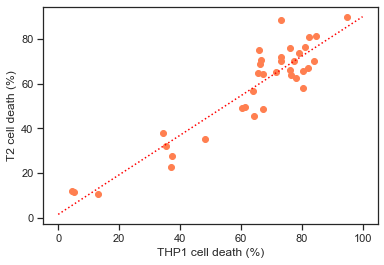

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X["THP1"], y)
ax.set_ylabel("T2 cell death (%)")
ax.set_xlabel("THP1 cell death (%)")
ax.plot(x_fit, y_pred, linestyle=":", color="red",);

In [56]:
print(" Model gradient: ", model.coef_[0])
print("Model intercept:", model.intercept_)

 Model gradient:  [0.8851822]
Model intercept: [1.44884536]


With just bacteraemia isolates, the prediction line has an equation of y = 0.89x + 1.45 

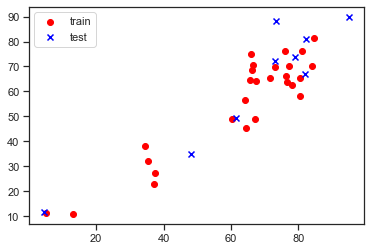

In [57]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="red", marker="o", label="train")
ax.scatter(test_X, test_y, color="blue", marker="x", label="test")
ax.legend()

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

model.score(test_X, test_y)

0.8406943052438514

Carriage

In [59]:
car_filter = data["Source"] == "Nose/skin (carriage)"
car = data[car_filter]

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

X = car[["THP1"]]
y = car[["T2"]]

model.fit(X, y)

x_fit = pd.DataFrame({"THP1": [0, 100]})
y_pred = model.predict(x_fit)

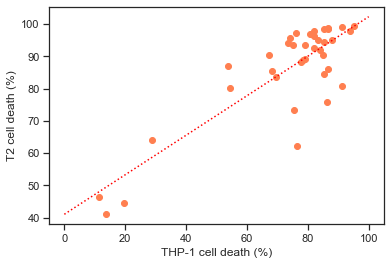

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X["THP1"], y)
ax.set_ylabel("T2 cell death (%)")
ax.set_xlabel("THP-1 cell death (%)")
ax.plot(x_fit, y_pred, linestyle=":", color="red",);

In [61]:
print(" Model gradient: ", model.coef_[0])
print("Model intercept:", model.intercept_)

 Model gradient:  [0.61221837]
Model intercept: [41.02660009]


With just carriage isolates, the prediction line has an equation of y = 0.61x + 41.03

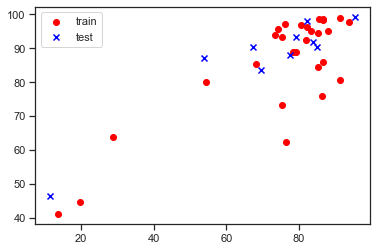

In [62]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="red", marker="o", label="train")
ax.scatter(test_X, test_y, color="blue", marker="x", label="test")
ax.legend()

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(train_X, train_y)

model.score(test_X, test_y)

0.8131734396864404

The model score greatly improves when looking at only bacteraemia or carriage isolates (0.84 and 0.81, respectively). This further confirms that there is significant difference in the toxicity of these two categories.

#### K nearest neighbours

Given the difference in toxicity between carriage and bacteraemia isolates, K nearest neighbours was used to produce a model which could predict whether an isolate was from the nose/skin or blood based on THP-1 and T2 toxicity. 

In [28]:
data2 = data = pd.read_csv("isolate_data2.csv",  na_values = "N/A")

data2 = data2.rename(columns= {"Mena T2 cell death (%)":"T2", "Mean THP1 cell death (%)":"THP1"})
data2

,Source,THP1,T2
0,0,80.533333,58.133333
1,0,37.333333,27.466667
2,0,5.233333,11.500000
3,0,73.200000,69.933333
4,0,84.033333,70.266667
...,...,...,...
69,1,69.400000,83.666667
70,1,13.566667,41.000000
71,1,54.300000,80.100000
72,1,67.400000,90.466667


For this model, I removed any unnecessary columns from the dataset and converted the source category to a binary system where 0 represents a carriage isolate and 1 represents a bacteraemia isolate

In [69]:
X = data2.drop("Source", axis=1)
y = data2["Source"]

This code creates two variables for the model. X refers to all the data except "Source" (created using the data.drop() function) in a 2D dataframe and y is the "Source" of each datapoint in a single column

In [70]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

The data was then split into train and test datasets to check the performance of the model

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    "n_neighbors" : range(1, 44),
}
model = GridSearchCV(KNeighborsClassifier(), parameters)
model.fit(train_X, train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 44)})

In [73]:
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"])
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]]

NameError: name 'cv_results' is not defined

This identified 3 as the optimal value for n_neighbours

In [75]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

We then fit our model using the optimal n_neighbours value of 3 using the model.fit() function

In [76]:
model.score(test_X, test_y)

0.9473684210526315

When we test our model, we get a very good model score of 0.95

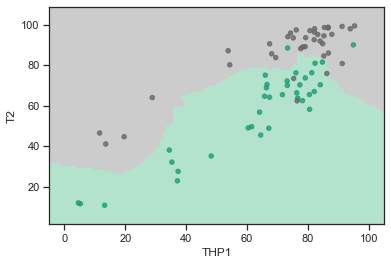

In [77]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)

plot_knn(model, X, y)

After this, we can visualise our data using the plot_knn() function. In agreement with the hgh model score, there is a clear separation between the two categories (green are bacteraemia and grey are carriage isolates)

In [82]:
data3 = pd.read_csv("dummy_isolate_data.csv",  na_values = "N/A")
data3


,THP1,T2
0,40.60,78.000000
1,60.68,29.466667
2,63.18,75.200000
3,35.00,12.210000
4,79.62,70.266667
5,59.44,65.000000
6,81.80,90.000000
7,86.53,76.200000
8,100.00,100.000000


Finally, we can import a new dataset of isolates with known THP-1 and T2 cell toxicity, but unknown source. We can then predict the source using our model and the clf.predict() function

In [84]:
model.predict(data3)

array([1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)